In [1]:
import pandas as pd

In [7]:
FullCorpus = pd.read_csv('SMSSpamCollection.tsv', sep = "\t" , header = None)

FullCorpus.columns = ['labels','body_text']
FullCorpus.head()

,labels,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [8]:
print('input data has {} rows and {} columns'.format(len(FullCorpus), len(FullCorpus.columns)))


input data has 5568 rows and 2 columns


In [9]:
# missing data 

print('No of Nulls in the labels: {}'.format(FullCorpus['labels'].isnull().sum()))
print('No of Nulls in the text: {}'.format(FullCorpus['body_text'].isnull().sum()))

No of Nulls in the labels: 0
No of Nulls in the text: 0


In [10]:
FullCorpus['body_len'] = FullCorpus['body_text'].apply(lambda x: len(x) - x.count(" "))
FullCorpus.head()

,labels,body_text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [12]:
import string
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count


FullCorpus['punct'] = FullCorpus['body_text'].apply(lambda x:count_punct(x))
FullCorpus['%punct'] = round(FullCorpus['punct']/(FullCorpus['body_len'])*100,3)
FullCorpus.head()

,labels,body_text,body_len,punct,%punct
0,ham,I've been searching for the right words to tha...,160,4,2.500
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,6,4.688
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,2,4.082
3,ham,Even my brother is not like to speak with me. ...,62,2,3.226
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,2,7.143


C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


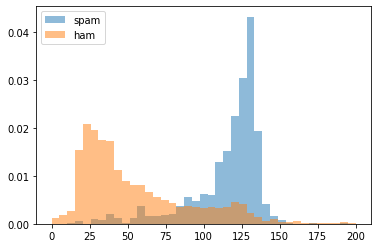

In [28]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline 

bins = np.linspace(0,200,40)

pyplot.hist(FullCorpus[FullCorpus['labels']== 'spam']['body_len'],bins , alpha = 0.5, normed = True,label ='spam')
pyplot.hist(FullCorpus[FullCorpus['labels']== 'ham']['body_len'],bins , alpha = 0.5, normed = True,label ='ham')
pyplot.legend(loc = 'upper left')
pyplot.show()

C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


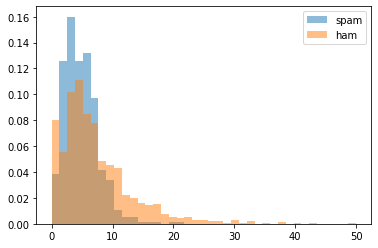

In [15]:
bins = np.linspace(0,50,40)

pyplot.hist(FullCorpus[FullCorpus['labels']== 'spam']['%punct'],bins , alpha = 0.5, normed = True,label ='spam')
pyplot.hist(FullCorpus[FullCorpus['labels']== 'ham']['%punct'],bins , alpha = 0.5, normed = True,label ='ham')
pyplot.legend(loc = 'upper right')
pyplot.show()

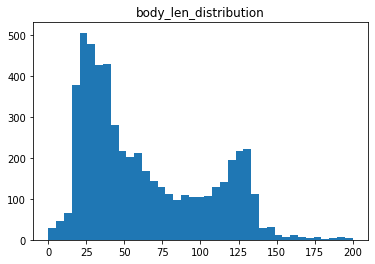

In [16]:
# feature transformation

bins = np.linspace(0,200,40)
pyplot.hist(FullCorpus['body_len'],bins)
pyplot.title('body_len_distribution')
pyplot.show()

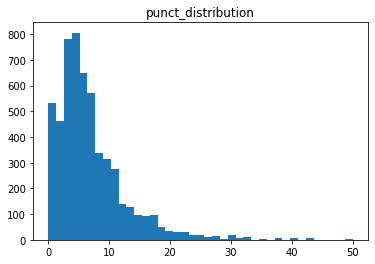

In [17]:
bins = np.linspace(0,50,40)
pyplot.hist(FullCorpus['%punct'],bins)
pyplot.title('punct_distribution')
pyplot.show()

In [19]:
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwards = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(words) for words in tokens if tokens not in stopwards]
    return text


tfidfvect = TfidfVectorizer(analyzer =clean_text)
X_tfidf = tfidfvect.fit_transform(FullCorpus['body_text'])
X_features = pd.concat([FullCorpus['body_len'],FullCorpus['%punct'],pd.DataFrame(X_tfidf.toarray())],axis = 1)
X_features.head()
    

,body_len,%punct,0,1,2,3,4,5,6,7,...,8198,8199,8200,8201,8202,8203,8204,8205,8206,8207
0,160,2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,cross_val_score

In [41]:
rf = RandomForestClassifier(n_jobs =-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf,X_features,FullCorpus['labels'],cv = k_fold, scoring ='accuracy',n_jobs = -1)

array([0.97127469, 0.97127469, 0.96588869, 0.96316262, 0.96945193])

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_features, FullCorpus['labels'],test_size = 0.2)

In [45]:
rf = RandomForestClassifier(n_estimators= 50, max_depth= 20, n_jobs =-1)
rf_model = rf.fit(X_train,y_train)

In [46]:
sorted(zip(rf_model.feature_importances_,X_train.columns), reverse = True)[0:10]

[(0.0384157698509296, 'body_len'),
 (0.03348171665499486, 7438),
 (0.026239231897153846, 2050),
 (0.02454169963430549, 1821),
 (0.022799083027942993, 6821),
 (0.019213532248055092, 392),
 (0.018703228888180882, 7934),
 (0.01814353457625422, 7305),
 (0.017195942657216988, 3165),
 (0.01655942182252478, 7104)]

In [59]:
from sklearn.metrics import precision_recall_fscore_support as score
y_predict = rf_model.predict(X_test)
precision,recall,fscore,support = score(y_test,y_predict,pos_label = 'spam',average= 'binary')
print('Precision :{} / Recall: {} / Accuracy: {}'. format(round(precision,3),
                                                         round(recall,3),
                                                          round((y_predict == y_test).sum()/len(y_predict),3)))

Precision :1.0 / Recall: 0.65 / Accuracy: 0.956
